In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")
from tqdm import tqdm
import cv2

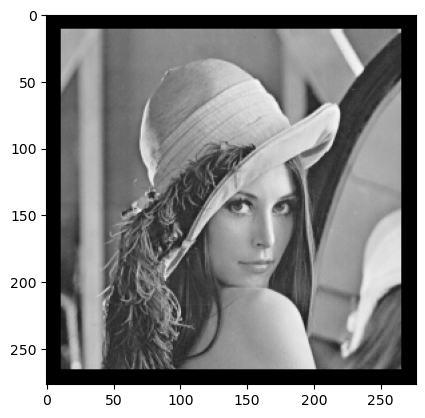

In [2]:
img = cv2.imread("lena.png",0)
plt.imshow(img,cmap="gray");

In [3]:
img.dtype

dtype('uint8')

In [4]:
from numpy.fft import fft2, ifft2
from scipy.signal import gaussian, convolve2d

In [5]:
def Gaussian_Blurring(given_img,kernel_size):
    dummy = np.copy(given_img)
    h = gaussian(kernel_size, 1).reshape(kernel_size, 1)
    h = np.dot(h, h.transpose())
    h /= np.sum(h)
    dummy = convolve2d(dummy, h, mode = 'valid')
    return dummy

In [6]:
def add_gaussian_noise(img, sigma):
    gauss = np.random.normal(0, sigma, np.shape(img))
    noisy_img = img + gauss
    noisy_img[noisy_img < 0] = 0
    noisy_img[noisy_img > 255] = 255
    return noisy_img

In [7]:
def wiener_filter(img, kernel, K):
    kernel /= np.sum(kernel)
    dummy = np.copy(img)
    dummy = fft2(dummy)
    kernel = fft2(kernel, s = img.shape)
    kernel = np.conj(kernel) / (np.abs(kernel) ** 2 + K)
    dummy = dummy * kernel
    dummy = np.abs(ifft2(dummy))
    return dummy

In [8]:
def gaussian_kernel(kernel_size = 3):
    h = gaussian(kernel_size, 1).reshape(kernel_size, 1)
    h = np.dot(h, h.transpose())
    h /= np.sum(h)
    return h

# σn = 1, σb = 1.5

In [9]:
blurred_img = Gaussian_Blurring(img,kernel_size=int(np.ceil(6*1.5+1)))

noisy_img = add_gaussian_noise(blurred_img, sigma = 1)

kernel = gaussian_kernel(kernel_size=int(np.ceil(6*1.5+1)))



In [10]:
K_val = np.arange(0.01,2.001,0.001)
min_rms = 10**10
k_min = 0
for k in K_val:
    filtered_img = wiener_filter(noisy_img, kernel, K =k )[0:-10,0:-10]
    rms_error = np.mean((img[10:-9,10:-9]-filtered_img)**2)
    if(rms_error<min_rms):
        min_rms = rms_error
        k_min = k
print("Optimal k = {}".format(k_min))

Optimal k = 1.9999999999999982


In [11]:
'''filtered_img = wiener_filter(noisy_img, kernel, K =1 )[0:-10,0:-10]
print(filtered_img.shape,img[10:-9,10:-9].shape)
display = [img[10:-11,10:-11], blurred_img[10:-11,10:-11], noisy_img[10:-11,10:-11], filtered_img]
label = ['Original Image', 'Gaussian Blurred Image', 'Gaussian Blurring + Gaussian Noise', 'Wiener Filter applied']

fig = plt.figure(figsize=(12, 10))

for i in range(len(display)):
    fig.add_subplot(2, 2, i+1)
    plt.imshow(display[i], cmap = 'gray')
    plt.title(label[i])

plt.show()'''

"filtered_img = wiener_filter(noisy_img, kernel, K =1 )[0:-10,0:-10]\nprint(filtered_img.shape,img[10:-9,10:-9].shape)\ndisplay = [img[10:-11,10:-11], blurred_img[10:-11,10:-11], noisy_img[10:-11,10:-11], filtered_img]\nlabel = ['Original Image', 'Gaussian Blurred Image', 'Gaussian Blurring + Gaussian Noise', 'Wiener Filter applied']\n\nfig = plt.figure(figsize=(12, 10))\n\nfor i in range(len(display)):\n    fig.add_subplot(2, 2, i+1)\n    plt.imshow(display[i], cmap = 'gray')\n    plt.title(label[i])\n\nplt.show()"

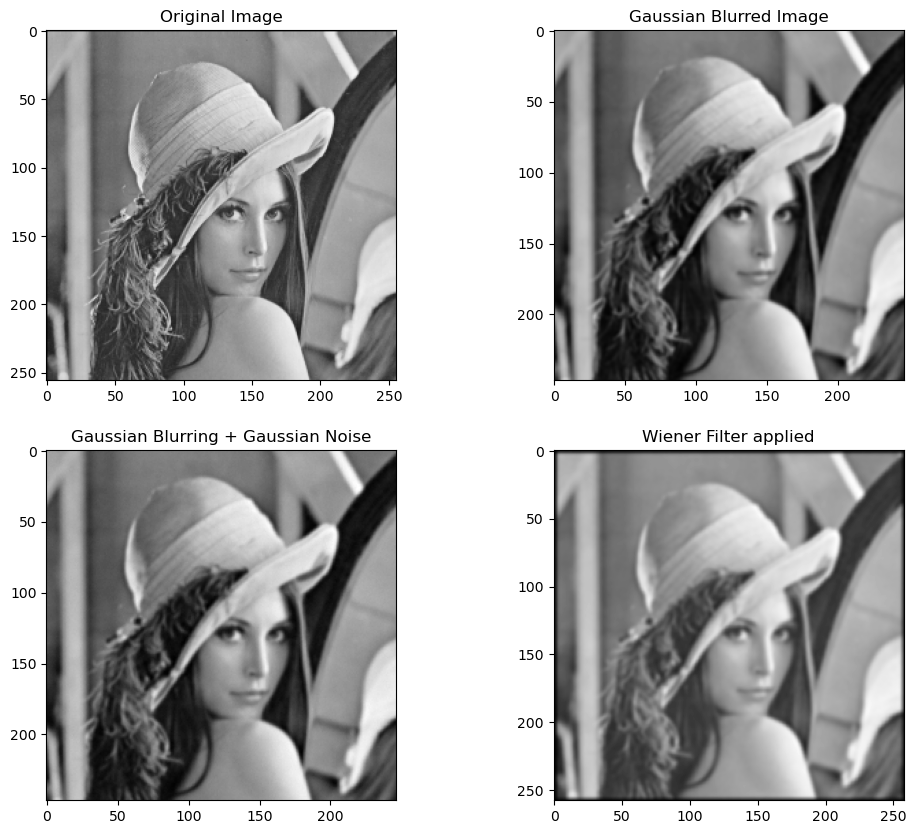

In [12]:
filtered_img = wiener_filter(noisy_img, kernel, K =k_min )[0:-10,0:-10]

display = [img[10:-11,10:-11], blurred_img[10:-11,10:-11], noisy_img[10:-11,10:-11], filtered_img]
label = ['Original Image', 'Gaussian Blurred Image', 'Gaussian Blurring + Gaussian Noise', 'Wiener Filter applied']

fig = plt.figure(figsize=(12, 10))

for i in range(len(display)):
    fig.add_subplot(2, 2, i+1)
    plt.imshow(display[i], cmap = 'gray')
    plt.title(label[i])

plt.show()

# σn = 5, σb = 1.5

In [13]:
blurred_img = Gaussian_Blurring(img,kernel_size=int(np.ceil(6*1.5+1)))

noisy_img = add_gaussian_noise(blurred_img, sigma = 5)

kernel = gaussian_kernel(kernel_size=int(np.ceil(6*1.5+1)))



K_val = np.arange(0.01,2.001,0.001)
min_rms = 10**10
k_min = 0
for k in K_val:
    filtered_img = wiener_filter(noisy_img, kernel, K =k )[0:-10,0:-10]
    rms_error = np.mean((img[10:-9,10:-9]-filtered_img)**2)
    if(rms_error<min_rms):
        min_rms = rms_error
        k_min = k
print("Optimal k = {}".format(k_min))

Optimal k = 1.9999999999999982


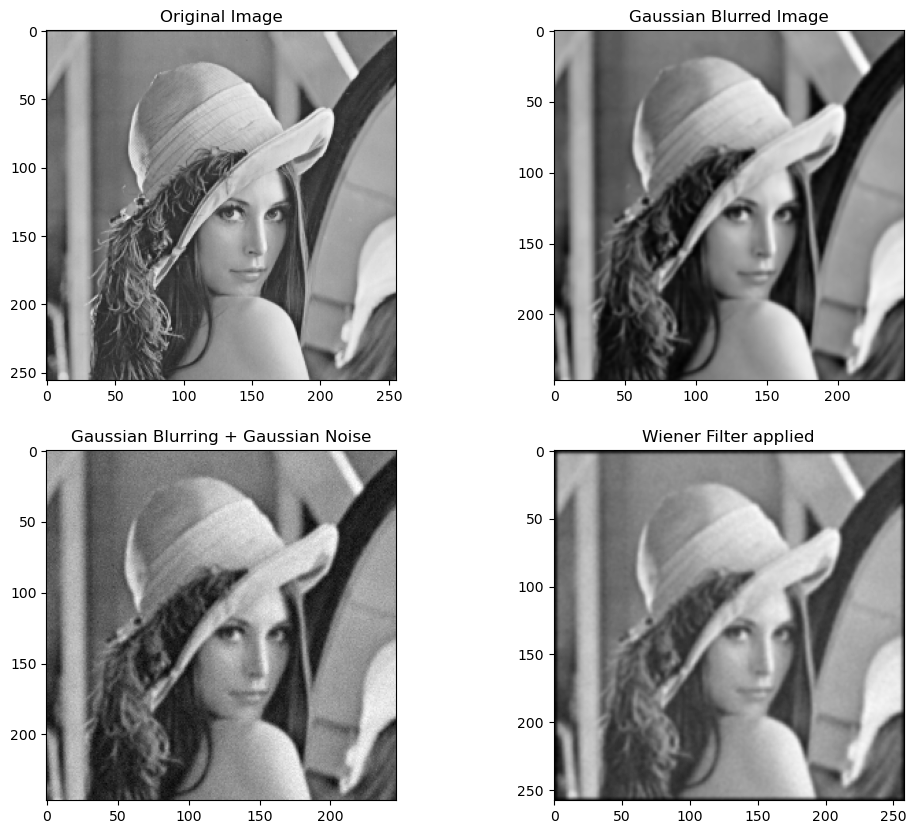

In [14]:
filtered_img = wiener_filter(noisy_img, kernel, K =k_min )[0:-10,0:-10]

display = [img[10:-11,10:-11], blurred_img[10:-11,10:-11], noisy_img[10:-11,10:-11], filtered_img]
label = ['Original Image', 'Gaussian Blurred Image', 'Gaussian Blurring + Gaussian Noise', 'Wiener Filter applied']

fig = plt.figure(figsize=(12, 10))

for i in range(len(display)):
    fig.add_subplot(2, 2, i+1)
    plt.imshow(display[i], cmap = 'gray')
    plt.title(label[i])

plt.show()

# σn = 15, σb = 1.5

In [15]:
blurred_img = Gaussian_Blurring(img,kernel_size=int(np.ceil(6*1.5+1)))

noisy_img = add_gaussian_noise(blurred_img, sigma = 15)

kernel = gaussian_kernel(kernel_size=int(np.ceil(6*1.5+1)))



K_val = np.arange(0.01,2.001,0.001)
min_rms = 10**10
k_min = 0
for k in K_val:
    filtered_img = wiener_filter(noisy_img, kernel, K =k )[0:-10,0:-10]
    rms_error = np.mean((img[10:-9,10:-9]-filtered_img)**2)
    if(rms_error<min_rms):
        min_rms = rms_error
        k_min = k
print("Optimal k = {}".format(k_min))

Optimal k = 1.9999999999999982


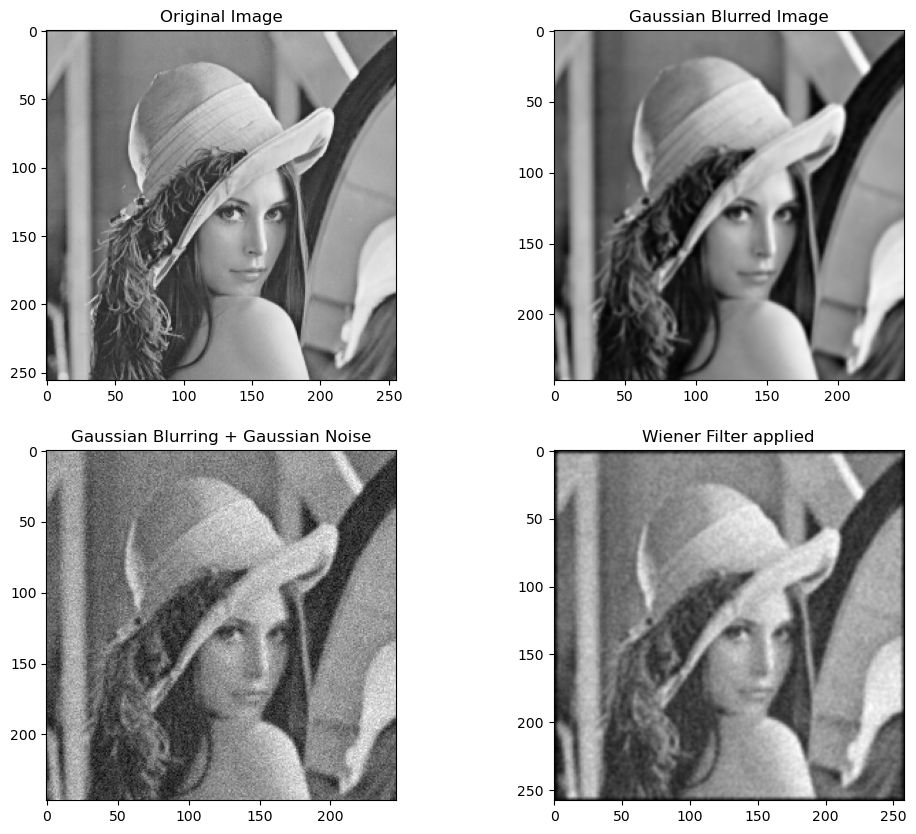

In [17]:
filtered_img = wiener_filter(noisy_img, kernel, K =k_min )[0:-10,0:-10]

display = [img[10:-11,10:-11], blurred_img[10:-11,10:-11], noisy_img[10:-11,10:-11], filtered_img]
label = ['Original Image', 'Gaussian Blurred Image', 'Gaussian Blurring + Gaussian Noise', 'Wiener Filter applied']

fig = plt.figure(figsize=(12, 10))

for i in range(len(display)):
    fig.add_subplot(2, 2, i+1)
    plt.imshow(display[i], cmap = 'gray')
    plt.title(label[i])

plt.show()